# Importando bibliotecas

In [215]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
import missingno           as msno
import requests 
import zipfile
from bs4 import BeautifulSoup
import lxml
import math

%matplotlib inline

pd.set_option('display.max_columns',500)

# Carregando dataset

### Download e extrai zip

In [20]:
url = 'http://www1.caixa.gov.br/loterias/_arquivos/loterias/D_lotfac.zip'
target_path = 'D_lotfac.zip'

response = requests.get(url, stream=True)
handle = open(target_path, "wb")
for chunk in response.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close()
with zipfile.ZipFile(target_path) as zf:
    zf.extractall()

### Parser no html extraído

In [21]:
fileHtml = 'd_lotfac.htm'

f = open(fileHtml, 'r', encoding='latin-1') 
table=f.read()

soup = BeautifulSoup(table, 'html.parser')
table = soup.find(name='table')

table_str = str(table)
df = pd.read_html(table_str)[0]

# Check dataset

In [22]:
df.shape

(8483, 33)

In [23]:
df.dtypes

Concurso                      int64
Data Sorteio                 object
Bola1                         int64
Bola2                         int64
Bola3                         int64
Bola4                         int64
Bola5                         int64
Bola6                         int64
Bola7                         int64
Bola8                         int64
Bola9                         int64
Bola10                        int64
Bola11                        int64
Bola12                        int64
Bola13                        int64
Bola14                        int64
Bola15                        int64
Arrecadacao_Total            object
Ganhadores_15_Números         int64
Cidade                       object
UF                           object
Ganhadores_14_Números         int64
Ganhadores_13_Números         int64
Ganhadores_12_Números         int64
Ganhadores_11_Números         int64
Valor_Rateio_15_Números      object
Valor_Rateio_14_Números     float64
Valor_Rateio_13_Números     

# Transformando dados

In [24]:
df['data_sorteio_conv'] = df.iloc[:,1]
df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)

df['day']   = df.data_sorteio_conv.dt.day
df['month'] = df.data_sorteio_conv.dt.month 
df['year']  = df.data_sorteio_conv.dt.year

In [25]:
df_ganhadores = df[:]

df_ganhadores.head()

,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,Bola9,Bola10,Bola11,Bola12,Bola13,Bola14,Bola15,Arrecadacao_Total,Ganhadores_15_Números,Cidade,UF,Ganhadores_14_Números,Ganhadores_13_Números,Ganhadores_12_Números,Ganhadores_11_Números,Valor_Rateio_15_Números,Valor_Rateio_14_Números,Valor_Rateio_13_Números,Valor_Rateio_12_Números,Valor_Rateio_11_Números,Acumulado_15_Números,Estimativa_Premio,Valor_Acumulado_Especial,data_sorteio_conv,day,month,year
0,1,29/09/2003,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,000,5,NaN,BA,154,4645,48807,257593,49.76582,68984.0,1000,400,200,000,000,000,2003-09-29,29,9,2003
1,1,29/09/2003,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,000,5,NaN,PR,154,4645,48807,257593,49.76582,68984.0,1000,400,200,000,000,000,2003-09-29,29,9,2003
2,1,29/09/2003,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,000,5,NaN,SP,154,4645,48807,257593,49.76582,68984.0,1000,400,200,000,000,000,2003-09-29,29,9,2003
3,1,29/09/2003,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,000,5,NaN,SP,154,4645,48807,257593,49.76582,68984.0,1000,400,200,000,000,000,2003-09-29,29,9,2003
4,1,29/09/2003,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,000,5,NaN,SP,154,4645,48807,257593,49.76582,68984.0,1000,400,200,000,000,000,2003-09-29,29,9,2003


# Limpando dataset

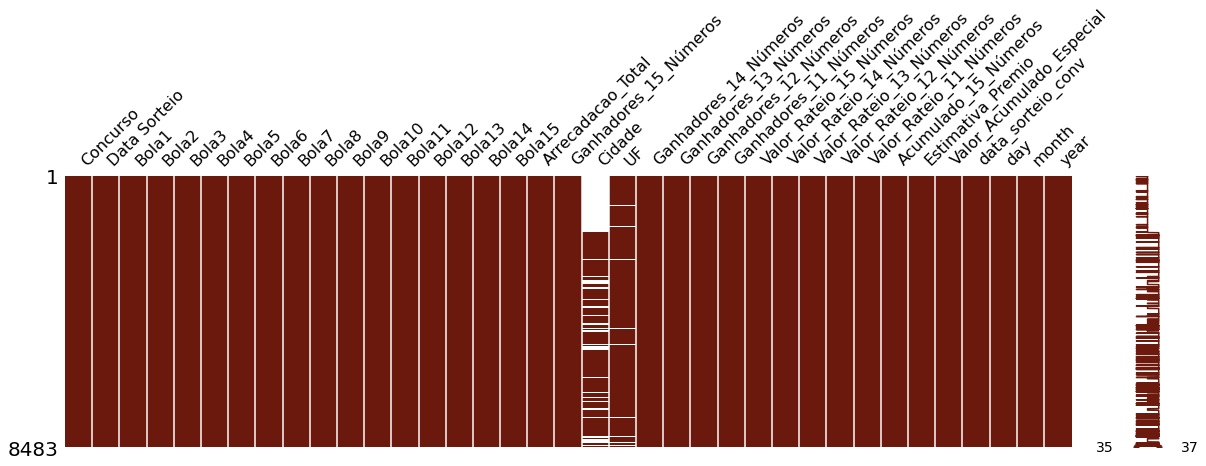

In [26]:
# Visão geral do dataframe
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

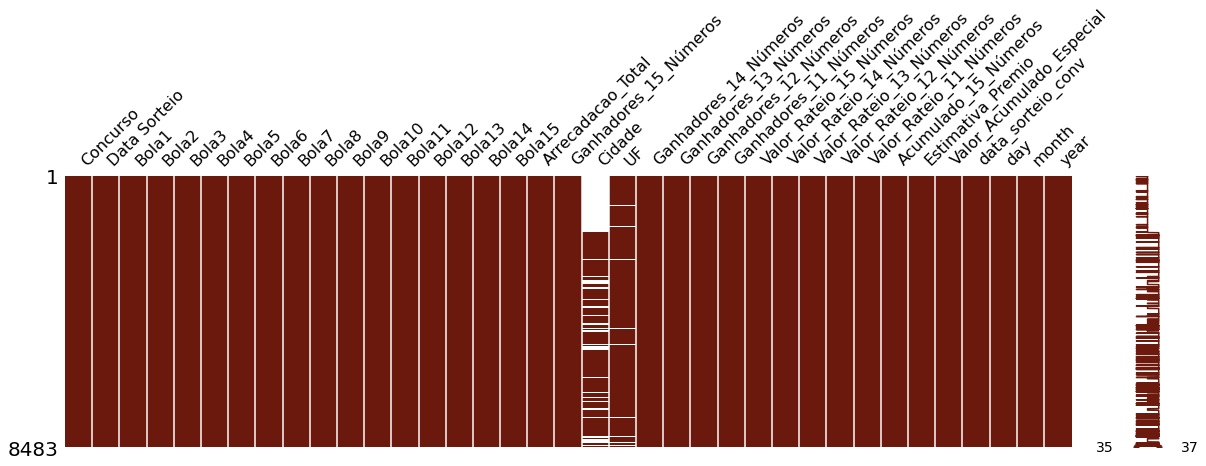

In [27]:
# Removendo valores nulos 
df = df.dropna(subset=['Concurso'])
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

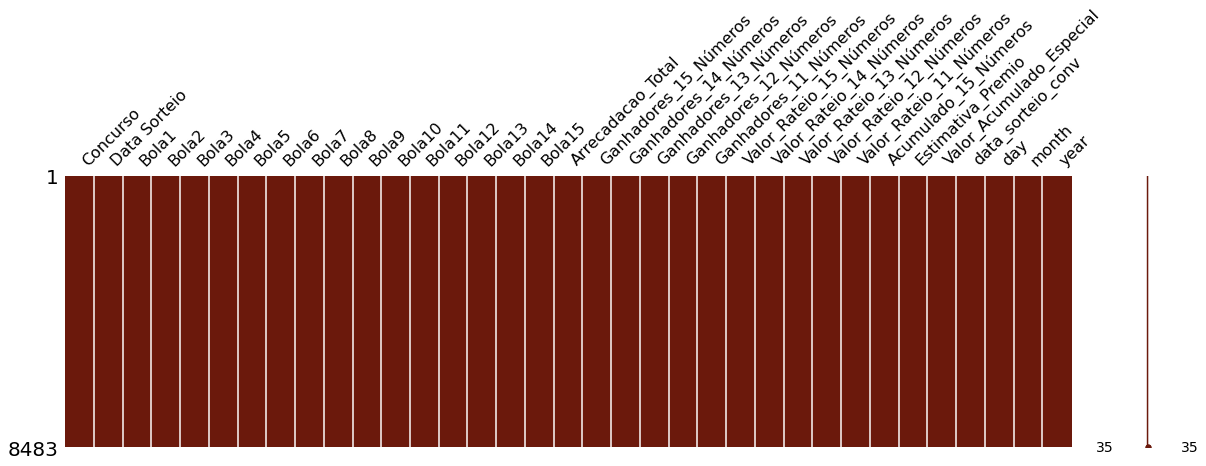

In [28]:
# Removendo colunas Cidade e UF
df = df.drop(['Cidade', 'UF'], axis=1)
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

# Exploratory Data Analysis

### Analisando sorteio com ganhadores

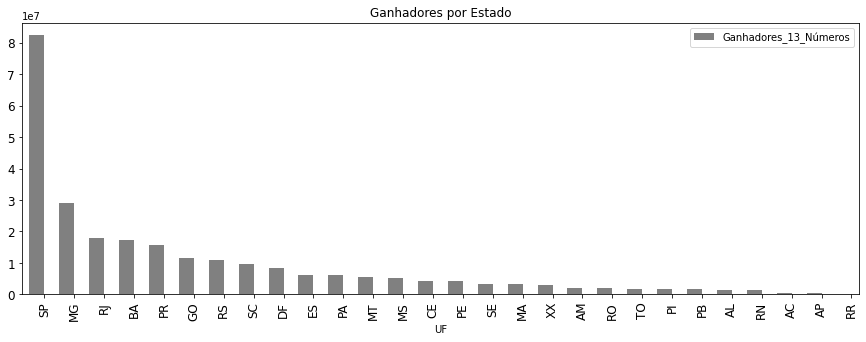

In [29]:
# Ganhadores X Volume do Prêmio por Estado 

ax = df_ganhadores.groupby(['UF'])['Ganhadores_13_Números'].agg('sum').sort_values(ascending=False).plot(kind='bar', title='Ganhadores por Estado', figsize=(15,5), fontsize=12, legend=True, position=1, color='gray')

# df_ganhadores.groupby(['UF'])['Rateio_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', ax=ax, secondary_y=True, legend=True, position=0, color='blue')

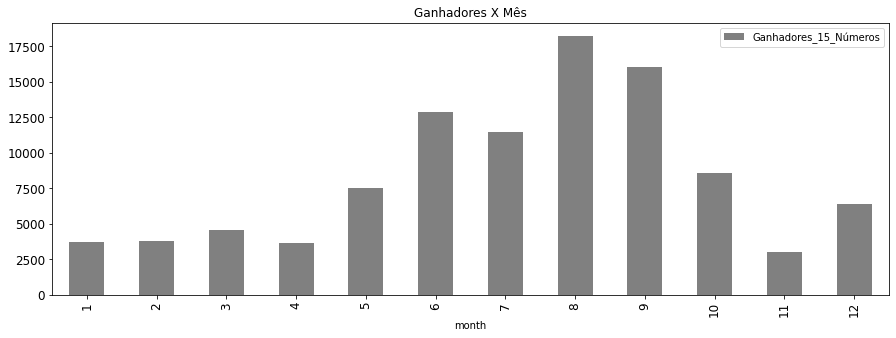

In [30]:
# Ganhadores X Mes

# Ganhadores X Volume do Prêmio por Estado 
df_ganhadores.groupby(['month'])['Ganhadores_15_Números'].agg('sum').plot(kind='bar', title='Ganhadores X Mês', fontsize=12, figsize=(15,5), legend=True, color='gray')

### Analisando dezenas sorteadas

In [31]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem

df.groupby(['Bola1','Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6','Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11','Bola12', 'Bola13', 'Bola14', 'Bola15']).size().sort_values(ascending=False)

Bola1  Bola2  Bola3  Bola4  Bola5  Bola6  Bola7  Bola8  Bola9  Bola10  Bola11  Bola12  Bola13  Bola14  Bola15
16     11     3      5      22     4      18     8      24     7       1       9       14      13      19        103
       18     13     24     19     23     22     10     6      8       1       5       11      3       15         94
12     3      18     17     6      4      8      11     14     23      19      21      25      22      1          66
14     13     2      6      4      25     16     1      9      21      20      7       23      18      10         51
10     1      4      25     19     7      22     11     9      23      17      14      13      18      3          50
                                                                                                                ... 
11     14     1      5      2      12     3      4      13     17      24      9       15      21      22          1
       12     13     8      16     24     25     5      15     9       

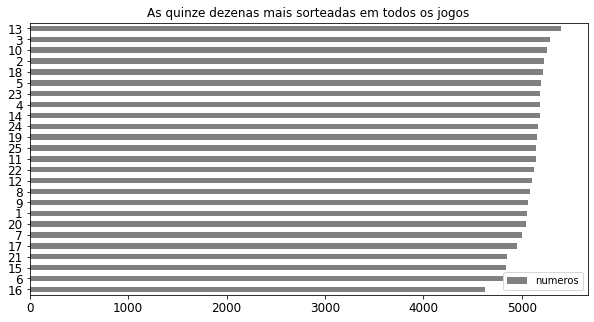

In [32]:
# As dezenas mais sorteadas em todos os jogos

dezenas = pd.DataFrame(df['Bola1'].tolist() + df['Bola2'].tolist() + df['Bola3'].tolist() + df['Bola4'].tolist() + df['Bola5'].tolist() + df['Bola6'].tolist() +df['Bola7'].tolist() + df['Bola8'].tolist() + df['Bola9'].tolist() + df['Bola10'].tolist() + df['Bola11'].tolist() + df['Bola12'].tolist() +
df['Bola13'].tolist() + df['Bola14'].tolist() + df['Bola15'].tolist(), columns=['numeros'])

dezenas['numeros'].value_counts().sort_values(ascending=True).plot(kind='barh', title='As quinze dezenas mais sorteadas em todos os jogos', figsize=(10,5), fontsize=12, legend=True, color='gray')

# Preparando o dataset para o modelo

In [33]:
# Criando dataframe que vamos usar nos modelos 

df_clean = df
index = 0
anterior = ''
for concurso in df['Concurso']:
    if(concurso == anterior):
        df_clean = df_clean.drop(index)
    index += 1
    anterior = concurso

df_clean.shape

df_nn = df_clean[['Bola1','Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6','Bola7', 'Bola8', 'Bola9', 'Bola10', 'Bola11','Bola12', 'Bola13', 'Bola14', 'Bola15', 'Ganhadores_15_Números']] 

# Deixando os nomes das coluna em minusculo
df_nn.columns = map(str.lower, df_nn.columns)

df_nn.head(15)

,bola1,bola2,bola3,bola4,bola5,bola6,bola7,bola8,bola9,bola10,bola11,bola12,bola13,bola14,bola15,ganhadores_15_números
0,18,20,25,23,10,11,24,14,6,2,13,9,5,16,3,5
5,23,15,5,4,12,16,20,6,11,19,24,1,9,13,7,1
6,20,23,12,8,6,1,7,11,14,4,16,10,9,17,24,2
8,16,5,25,24,23,8,12,2,17,18,1,10,4,19,13,1
9,15,13,20,2,11,24,9,16,4,23,25,12,8,19,1,2
11,23,19,1,5,7,21,16,10,15,25,6,2,12,4,17,2
13,22,4,15,8,16,14,21,23,12,1,25,19,7,10,18,9
22,19,16,18,9,13,8,5,25,17,10,6,15,1,22,20,1
23,21,4,17,5,3,13,16,9,20,24,25,19,11,15,10,3
26,24,19,8,23,6,2,20,11,9,3,4,10,5,12,14,0


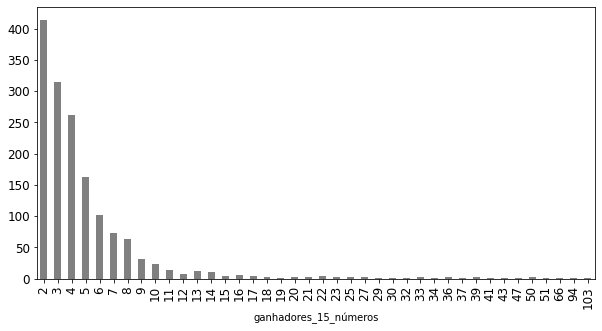

In [34]:
# Pode existir mais de um ganhador por jogo
df_nn[df_nn['ganhadores_15_números'] > 1].groupby('ganhadores_15_números')['ganhadores_15_números'].agg('count').plot(kind='bar',figsize=(10,5), color='gray', fontsize=12)

1    1940
0     172
Name: ganhadores_15_números, dtype: int64


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


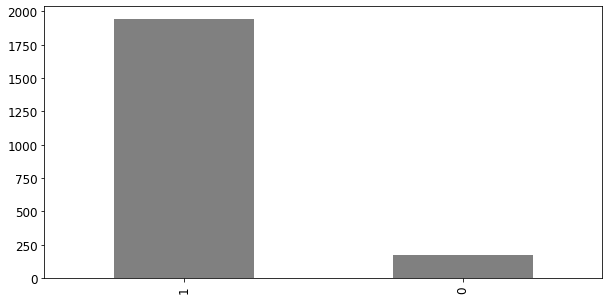

In [35]:
# Então tudo jogo que tiver um ou mais ganhadores deixamos como o numeoro 1
df_nn.loc[df_nn['ganhadores_15_números'] > 0, 'ganhadores_15_números'] = 1

df_nn['ganhadores_15_números'].value_counts().plot(kind='bar', figsize=(10,5), color='gray', fontsize=12)

print(df_nn['ganhadores_15_números'].value_counts())

# Rede neural

In [36]:
from keras.models  import Sequential
from keras.layers  import Dense
from sklearn.model_selection import train_test_split

In [37]:
# Definição do seed para a reproducidade do modelo
np.random.seed(8)

In [38]:
# Separando target e classes
features = df_nn.iloc[:,0:15]
target   = df_nn.iloc[:,15]

In [39]:
# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [40]:
# Criando modelo
modelo = Sequential()
modelo.add(Dense(10, input_dim=15, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [41]:
# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Treinando modelo
modelo.fit(y_train, X_train, epochs=30, batch_size=10)

Epoch 1/30
142/142 [==============================] - 1s 1ms/step - loss: 0.4893 - accuracy: 0.8834
Epoch 2/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.9154
Epoch 3/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.9178
Epoch 4/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.9148
Epoch 5/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.9042
Epoch 6/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.9149
Epoch 7/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.9094
Epoch 8/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 0.9163
Epoch 9/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2900 - accuracy: 0.9131
Epoch 10/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.9105

# Validando Modelo

In [43]:
# Avaliando modelo
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

22/22 [==============================] - 0s 1ms/step - loss: 0.3117 - accuracy: 0.9268


Acuracia do modelo

accuracy: 92.682928%


# Predict 

### Teste de probabilidade de um jogo

In [44]:
numero_sorteio = [[1, 2, 3, 5, 7, 8, 10, 11, 12, 14, 15, 17, 21, 22, 24]]

y_predict = pd.DataFrame(numero_sorteio)
y_predict

predict_class = modelo.predict_classes(y_predict)
print("1 = Tem chance de ganhar / 0 = Não tem chance de ganhar")
print("\n")
print("Previsão Modelo: ",predict_class[0][0])

1 = Tem chance de ganhar / 0 = Não tem chance de ganhar


Previsão Modelo:  1


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
# Achando a probabilidade
predict_proba = modelo.predict_proba(y_predict)
print("Probabilidade: ", round((predict_proba[0][0]*100),2), "%")

Probabilidade:  98.4 %


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


# Gerando numero

In [53]:
import random

random.seed(25)

probabilidade_boa = 99
probabilidade_atual = 0

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['bola1','bola2','bola3','bola4','bola5','bola6','bola7','bola8','bola9','bola10','bola11','bola12','bola13','bola14','bola15']].values.tolist()

# Gera sequencia de numeros até que a probabilidade seja maior ou igual que 99%
while(probabilidade_atual < probabilidade_boa):
    
    # Gera sequencia de número 
    dezenas = random.sample(range(1, 25), 15)
    
    # Numero gerado já foi sorteado?
    if not dezenas in dezenas_sorteadas:

        # Valida qual a probabilidade da seguência ser sorteada
        probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas]))[0][0]*100)
    

print("Probabilidade de {0} % -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas)))   

Probabilidade de 99 % -> Dezenas: [1, 2, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 21, 23, 24]


In [54]:

# Gera sequencia de número 
dezenas_random = random.sample(range(1, 25), 15)

# Numero gerado já foi sorteado?
if not dezenas_random in dezenas_sorteadas:

    # Valida qual a probabilidade da seguência ser sorteada
    probabilidade_atual = int(modelo.predict(pd.DataFrame([dezenas_random]))[0][0]*100)

print("Probabilidade de {0} % -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_random)))   

Probabilidade de 96 % -> Dezenas: [3, 4, 5, 6, 8, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23]


### Gerando jogos baseando na tendência de que n bolas do jogo anterior se repetem no próximo

In [237]:
valConcurso = []
valConcurso.append(0)
probabildade_n_bolas_repetidas = []
probabildade_n_bolas_repetidas.append(0)
for n in range(15):
  n = n + 1
  concurso = []
  counts = []
  anterior = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  arr = []
  nConcurso = 0
  for index, row in df_nn.iterrows():
    nConcurso += 1
    concurso = []
    concurso.append(row['bola1'])
    concurso.append(row['bola2'])
    concurso.append(row['bola3'])
    concurso.append(row['bola4'])
    concurso.append(row['bola5'])
    concurso.append(row['bola6'])
    concurso.append(row['bola7'])
    concurso.append(row['bola8'])
    concurso.append(row['bola9'])
    concurso.append(row['bola10'])
    concurso.append(row['bola11'])
    concurso.append(row['bola12'])
    concurso.append(row['bola13'])
    concurso.append(row['bola14'])
    concurso.append(row['bola15'])
    count = 0
    for x in range(15):
      if(np.count_nonzero(concurso==anterior[x]) > 0):
        count += 1
      if(count == n):
        arr.append(nConcurso)
        counts.append(count)
        break
    anterior = concurso
  valConcurso.append(arr)
  print('Probabilidade de repetir {0:d} números do jogo anterior: {1:.2f}%'.format(n,(len(counts)/df_nn.shape[0])*100))
  print('{} vezes que {} números se repetiram no próximo jogo, em um total de {} jogos'.format(len(counts), n, df_nn.shape[0]))
  probabildade_n_bolas_repetidas.append(len(counts))

Probabilidade de repetir 1 números do jogo anterior: 99.95%
2111 vezes que 1 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade de repetir 2 números do jogo anterior: 99.95%
2111 vezes que 2 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade de repetir 3 números do jogo anterior: 99.95%
2111 vezes que 3 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade de repetir 4 números do jogo anterior: 99.95%
2111 vezes que 4 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade de repetir 5 números do jogo anterior: 99.95%
2111 vezes que 5 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade de repetir 6 números do jogo anterior: 99.91%
2110 vezes que 6 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade de repetir 7 números do jogo anterior: 98.67%
2084 vezes que 7 números se repetiram no próximo jogo, em um total de 2112 jogos
Probabilidade

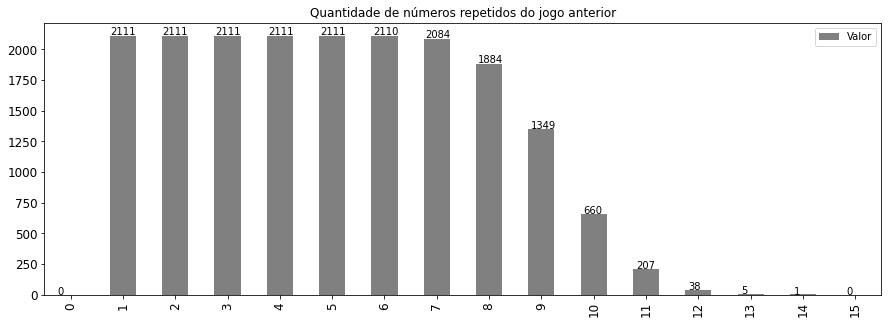

In [245]:
ax = pd.DataFrame(probabildade_n_bolas_repetidas, columns=['Valor']).plot(kind='bar', title='Quantidade de números repetidos do jogo anterior', figsize=(15,5), fontsize=12, legend=True, color='gray')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Aqui podemos analisar quais concursos tiveram repetição de "num_bolas" do concurso anterior. Podemos inferir probabilidades disso ocorrer novamente no futuro.

In [266]:
num_bolas = 7
print(valConcurso[num_bolas])

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,

In [268]:
ultimo_sorteio = sorted(anterior)
jogos = 20
jogo_ok = False
print("####################################################################")
print("################        Dicas para concurso nº      ################")
print("################               {0}                 ################".format(df_nn.shape[0]+1))
print("####################################################################")
print("")
print("Concurso anterior: ", ultimo_sorteio)
print("")
for x in range(jogos):
    indexes = random.sample(range(0, 15), num_bolas)
    valores = [ ultimo_sorteio[i] for i in indexes ]
    final = valores.copy()
    indexes = random.sample(range(0, 15), 15)
    for index in indexes:
        if not dezenas[index] in valores and not dezenas[index] in ultimo_sorteio:
            final.append(dezenas[index])
        if(len(final) == 15):
            break
    if len(final) < 15:
        valor_faltando = 15 - len(final)
        while valor_faltando:
            valor_aleatorio = random.sample(range(1, 25), 1)[0]
            if not valor_aleatorio in valores and not valor_aleatorio in ultimo_sorteio and not valor_aleatorio in final:
                final.append(valor_aleatorio)
                valor_faltando -= 1
    
        jogo_ok = True
    elif final in dezenas_sorteadas:
        print('Já sorteado')
    if jogo_ok:
        probabilidade_atual = int(modelo.predict(pd.DataFrame([final]))[0][0]*100)
        print("{0} % -> {1} || Números do concurso anterior: {2}".format(probabilidade_atual, sorted(final), sorted(valores)))   

####################################################################
################        Dicas para concurso nº      ################
################               2113                 ################
####################################################################

Concurso anterior:  [2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 18, 22, 24, 25]

96 % -> [1, 3, 6, 7, 10, 11, 13, 14, 16, 17, 20, 21, 22, 23, 25] || Números do concurso anterior: [3, 7, 10, 11, 16, 22, 25]
83 % -> [1, 4, 6, 7, 10, 11, 13, 14, 16, 17, 18, 19, 21, 23, 24] || Números do concurso anterior: [4, 7, 10, 11, 16, 18, 24]
91 % -> [1, 5, 6, 7, 9, 11, 12, 13, 14, 15, 17, 21, 22, 23, 24] || Números do concurso anterior: [7, 9, 11, 12, 15, 22, 24]
91 % -> [1, 2, 3, 6, 8, 9, 13, 14, 15, 17, 18, 19, 21, 23, 25] || Números do concurso anterior: [2, 3, 8, 9, 15, 18, 25]
85 % -> [1, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 20, 21, 23, 24] || Números do concurso anterior: [3, 7, 8, 11, 12, 15, 24]
92 % -> [1, 2, 5, 6, 7, 9, 11,